# DATA

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('../KaDo.csv')

In [2]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

In [3]:
data.columns

Index(['TICKET_ID', 'MOIS_VENTE', 'PRIX_NET', 'FAMILLE', 'UNIVERS', 'MAILLE',
       'LIBELLE', 'CLI_ID'],
      dtype='object')

In [4]:
data.isna().sum()

TICKET_ID     0
MOIS_VENTE    0
PRIX_NET      0
FAMILLE       0
UNIVERS       0
MAILLE        0
LIBELLE       0
CLI_ID        0
dtype: int64

In [5]:
data['PRIX_NET'].describe()

count    7.245522e+06
mean     5.970084e+00
std      5.885542e+00
min      1.000000e-02
25%      1.950000e+00
50%      4.250000e+00
75%      7.450000e+00
max      1.575000e+03
Name: PRIX_NET, dtype: float64

In [6]:
products = data['LIBELLE'].value_counts().to_frame()
products.reset_index(inplace=True)
products = products.rename(columns = {'index':'name', 'LIBELLE': 'count'})
products

,name,count
0,DEMAQ EXPRESS PUR BLEUET FL125ML,158762
1,GD JDM4 LOTUS FL200ML,85914
2,GD JDM4 GRENADE FL200ML,81406
3,SVC CREME QUOTIDIENNE T75ml,72394
4,MDT SD DES LAGONS 150 ML,64400
...,...,...
1479,LAIT ENFANT IP30 FL150 PROT VEG,1
1480,EDT ODE A L' AMOUR PASSIONNEMENT30ML,1
1481,FDT PINCEAU ECLAT MEDIUM CN3 15,1
1482,HYDRA SEVE NUIT HYDRASP P50ML,1


In [7]:
products[products['count'] > 100]

,name,count
0,DEMAQ EXPRESS PUR BLEUET FL125ML,158762
1,GD JDM4 LOTUS FL200ML,85914
2,GD JDM4 GRENADE FL200ML,81406
3,SVC CREME QUOTIDIENNE T75ml,72394
4,MDT SD DES LAGONS 150 ML,64400
...,...,...
1163,BIO CREME DOUCHE MAUVE 200 ML,105
1164,VAO GLITTER ROS/PAILL HIV13 ANI LU4 3ML,104
1165,VAO OR SCINTIL NOEL12 LU4 ANI 3ML,104
1166,FAP MONO BAIE ROSE CN3 3g,102


In [8]:
parfum = data[data['LIBELLE'] == 'DEMAQ EXPRESS PUR BLEUET FL125ML']
parfum_prix_net = parfum['PRIX_NET']

In [9]:
parfum_prix_net.describe()

count    158762.000000
mean          4.480944
std           1.992971
min           0.010000
25%           3.600000
50%           3.650000
75%           3.950000
max          65.700000
Name: PRIX_NET, dtype: float64

In [10]:
parfum_prix_net[parfum_prix_net > 14].describe()

count    1239.000000
mean       16.942050
std         5.137828
min        14.100000
25%        14.600000
50%        14.600000
75%        17.500000
max        65.700000
Name: PRIX_NET, dtype: float64

In [11]:
model = IsolationForest(contamination=0.01)
outliers_idx = model.fit_predict(parfum_prix_net.to_numpy().reshape(-1, 1))

In [12]:
parfum_prix_net[outliers_idx == -1].index

Int64Index([  21847,   33760,   36566,   36591,   57954,   60821,   61967,
              71806,   78376,   78389,
            ...
            7146850, 7159068, 7163924, 7175435, 7183006, 7185457, 7189416,
            7194018, 7201167, 7239440],
           dtype='int64', length=1514)

In [13]:
data['MOIS_VENTE'][parfum_prix_net[outliers_idx == -1].index].value_counts()

1     187
3     183
12    172
7     141
9     137
6     128
10    121
4     112
2     110
5     101
11     66
8      56
Name: MOIS_VENTE, dtype: int64

In [14]:
parfum[['FAMILLE', 'UNIVERS', 'MAILLE']].value_counts()

FAMILLE          UNIVERS           MAILLE    
SOINS DU VISAGE  VIS_DEMAQ BLEUET  VIS_AUTRES    158762
dtype: int64

In [15]:
parfum

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
205,36111293,12,3.50,SOINS DU VISAGE,VIS_DEMAQ BLEUET,VIS_AUTRES,DEMAQ EXPRESS PUR BLEUET FL125ML,131204016
213,35117363,8,3.95,SOINS DU VISAGE,VIS_DEMAQ BLEUET,VIS_AUTRES,DEMAQ EXPRESS PUR BLEUET FL125ML,169985247
304,35183711,8,3.65,SOINS DU VISAGE,VIS_DEMAQ BLEUET,VIS_AUTRES,DEMAQ EXPRESS PUR BLEUET FL125ML,275493987
326,34502875,6,3.65,SOINS DU VISAGE,VIS_DEMAQ BLEUET,VIS_AUTRES,DEMAQ EXPRESS PUR BLEUET FL125ML,321933797
371,35271713,9,3.60,SOINS DU VISAGE,VIS_DEMAQ BLEUET,VIS_AUTRES,DEMAQ EXPRESS PUR BLEUET FL125ML,356998310
...,...,...,...,...,...,...,...,...
7245231,35849427,11,3.95,SOINS DU VISAGE,VIS_DEMAQ BLEUET,VIS_AUTRES,DEMAQ EXPRESS PUR BLEUET FL125ML,997048290
7245232,36063055,11,7.30,SOINS DU VISAGE,VIS_DEMAQ BLEUET,VIS_AUTRES,DEMAQ EXPRESS PUR BLEUET FL125ML,997048290
7245233,36302012,12,3.65,SOINS DU VISAGE,VIS_DEMAQ BLEUET,VIS_AUTRES,DEMAQ EXPRESS PUR BLEUET FL125ML,997048290
7245236,36507016,12,2.88,SOINS DU VISAGE,VIS_DEMAQ BLEUET,VIS_AUTRES,DEMAQ EXPRESS PUR BLEUET FL125ML,997048290


<AxesSubplot:xlabel='PRIX_NET', ylabel='MOIS_VENTE'>

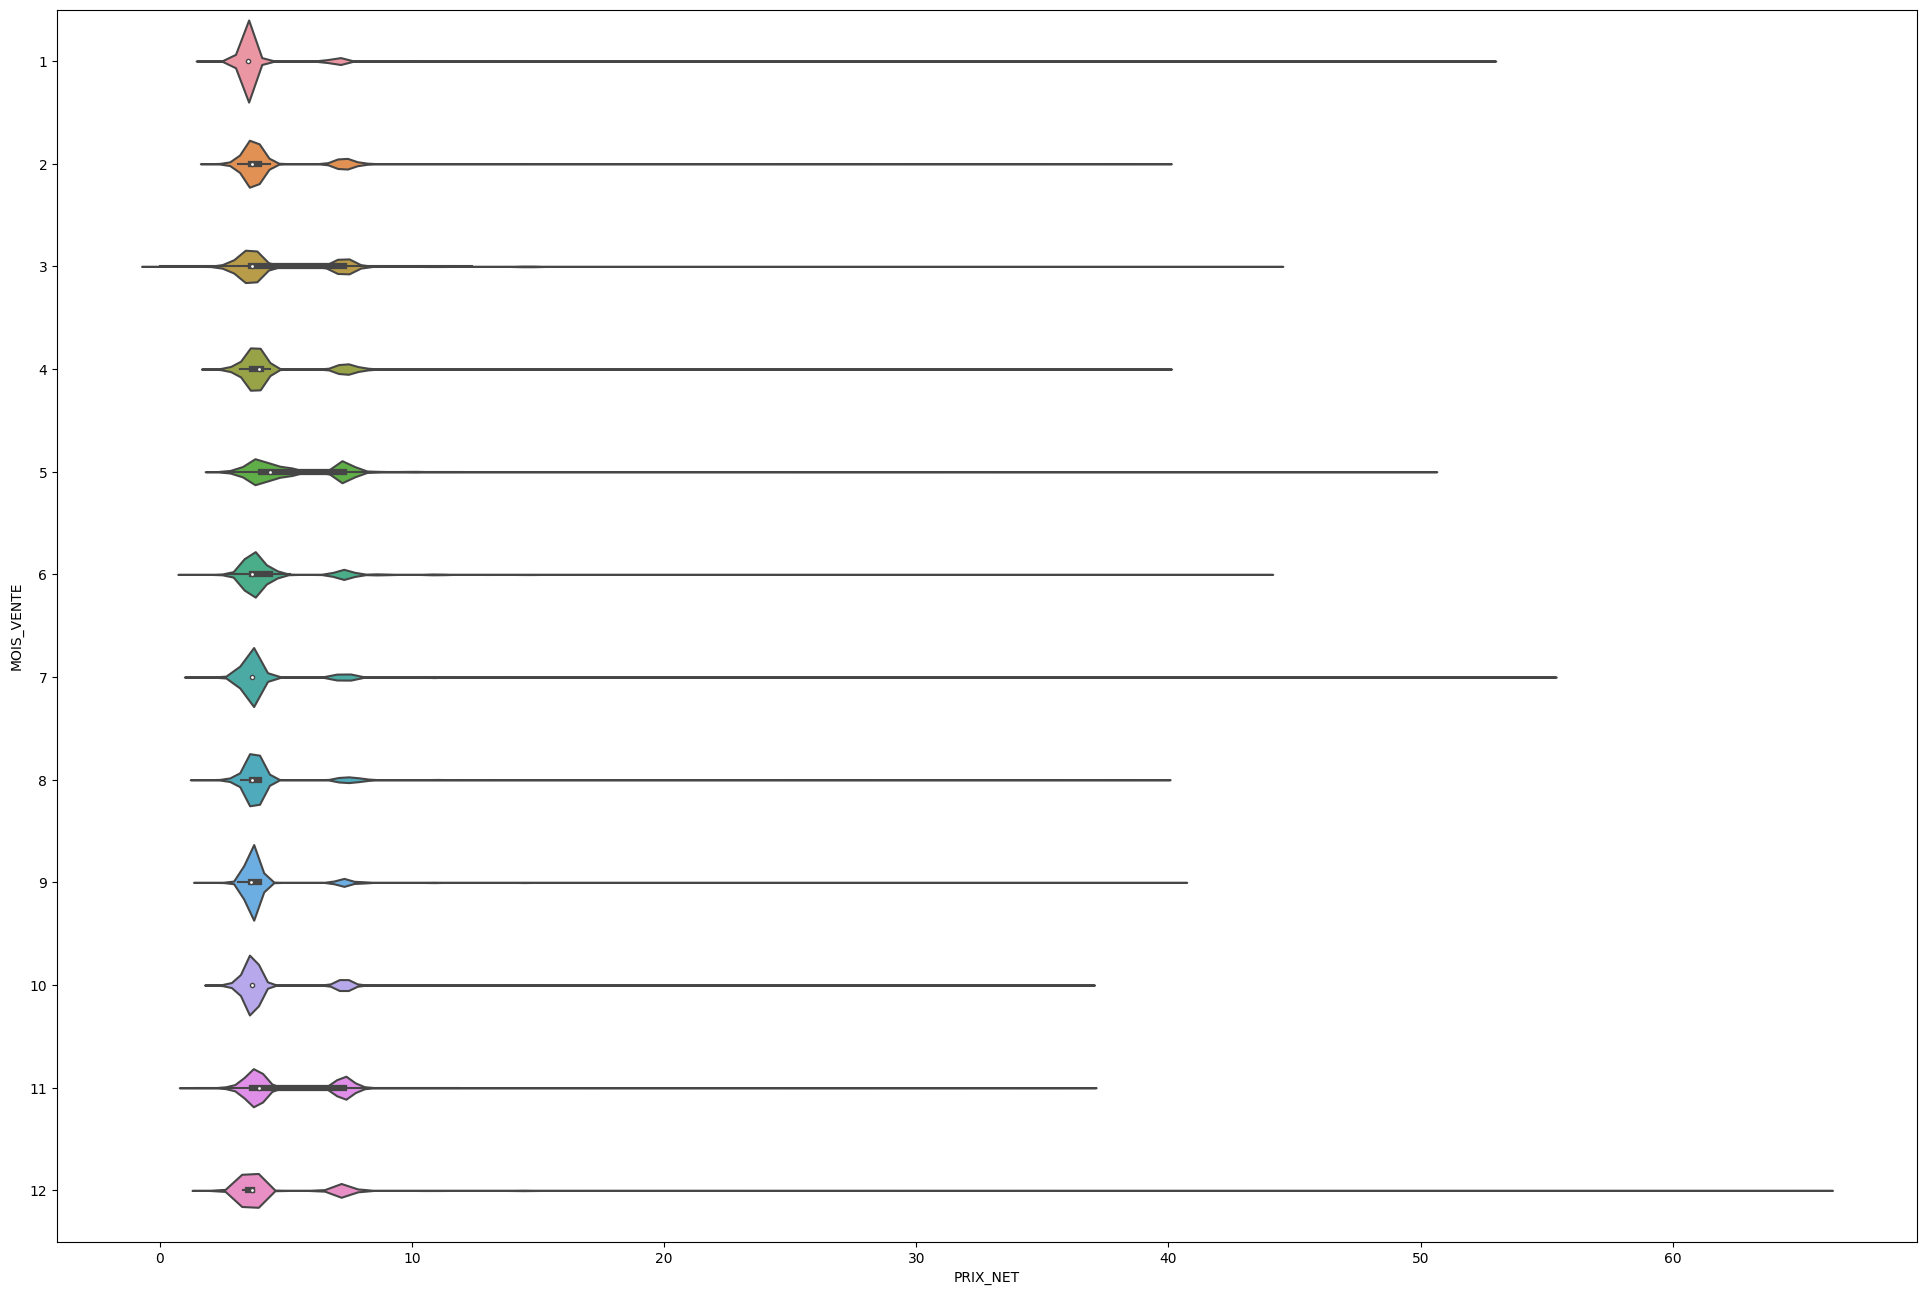

In [16]:
fig, ax = plt.subplots(figsize=(24,16))
sns.violinplot(data=parfum, x="PRIX_NET", y="MOIS_VENTE", ax=ax, orient="h")

<AxesSubplot:xlabel='PRIX_NET', ylabel='MOIS_VENTE'>

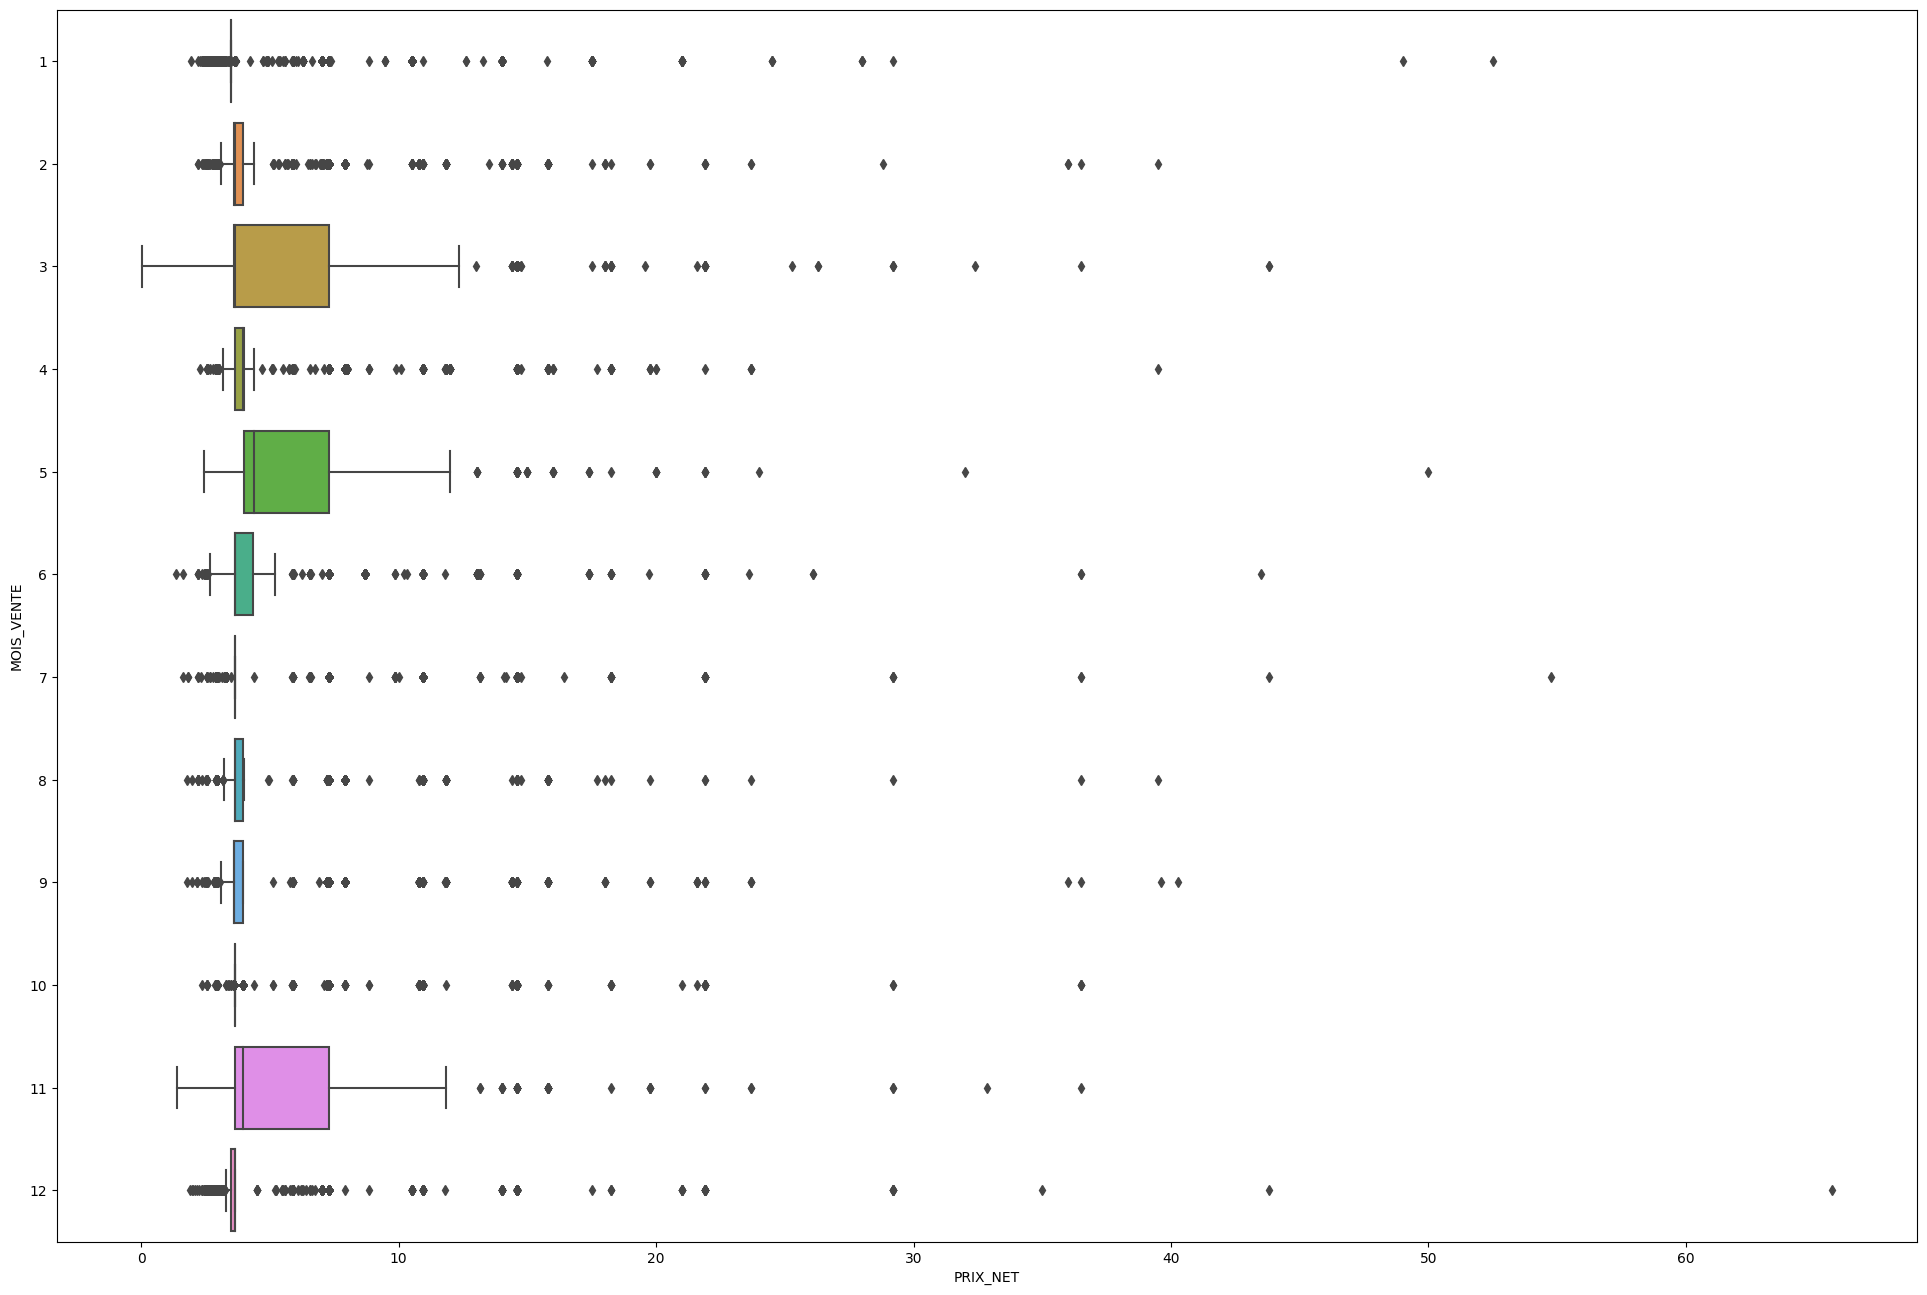

In [17]:
fig, ax = plt.subplots(figsize=(24,16))
sns.boxplot(data=parfum, x="PRIX_NET", y="MOIS_VENTE", ax=ax, orient="h")

<AxesSubplot:xlabel='PRIX_NET'>

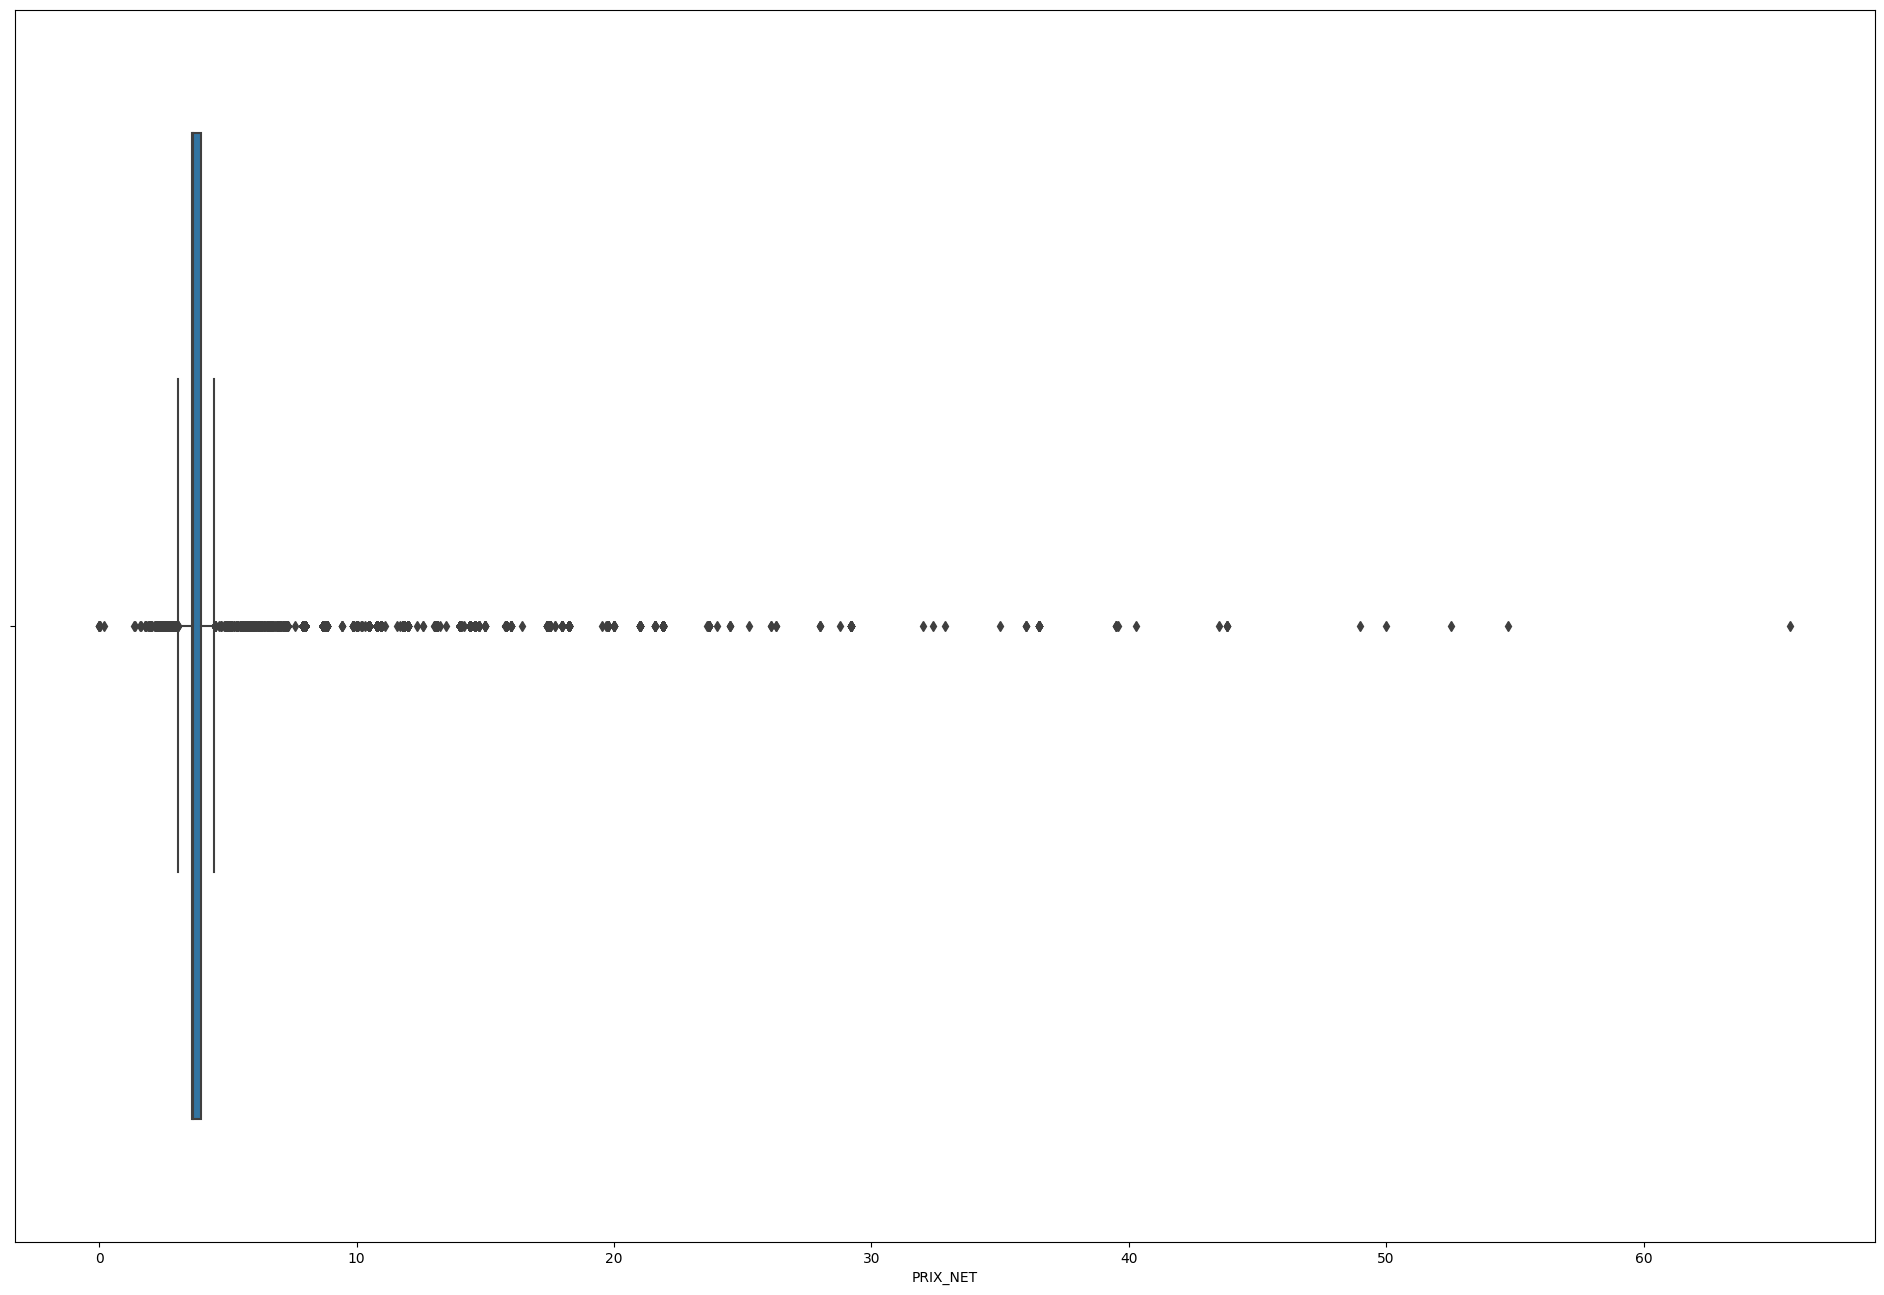

In [18]:
fig, ax = plt.subplots(figsize=(24,16))
sns.boxplot(data=parfum, x="PRIX_NET", ax=ax, orient="h")

# VISUALIZATION AND DATA EXPLORATION

## Numbers of items per Maille, Univers, Family

In [204]:
data

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
0,35592159,10,1.67,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281
1,35592159,10,1.66,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281
2,35592159,10,7.45,SOINS DU VISAGE,VIS_CJOUR Jeunes Specifique,VIS_JEUNE_ET_LEVRE,CR JR PARF BIO.SPE AC.SENT.50ML,1490281
3,35592159,10,5.95,SOINS DU VISAGE,VIS_DEMAQ AAAR,VIS_AAAR_DEMAQLOTION,EAU MICELLAIRE 3 THES FL200ML,1490281
4,35592159,10,1.67,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 TIARE FL 200ML,1490281
...,...,...,...,...,...,...,...,...
7245517,35448190,9,2.50,SOINS DU CORPS,CORPS_SOIN DES MAINS,CORPS_HYDRA_NOURRI_ET_SOINS,SVC CR MAINS ET ONGLES T75ml,997385337
7245518,35448190,9,3.00,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 LAVANDIN DE PROVENCE 200ML,997385337
7245519,36105678,12,7.90,MAQUILLAGE,MAQ_YEUX Crayons,MAQ_YEUX_CLASSIQUE,CRAYON REGARD PRUNE CN3 1.3G,997385337
7245520,36105678,12,11.45,MAQUILLAGE,MAQ_YEUX Mascara Elixir,MAQ_YEUX_MASCA_HG,MASCARA SOIN NOIR01 2014 CN3 9ML,997385337


In [205]:
sns.set_style("darkgrid")

In [224]:
unique_items_df = data.drop_duplicates(subset=['LIBELLE'])
families = data['FAMILLE'].unique()
meshes = data['MAILLE'].unique()
universes = data['UNIVERS'].unique()
items = data['LIBELLE'].unique()

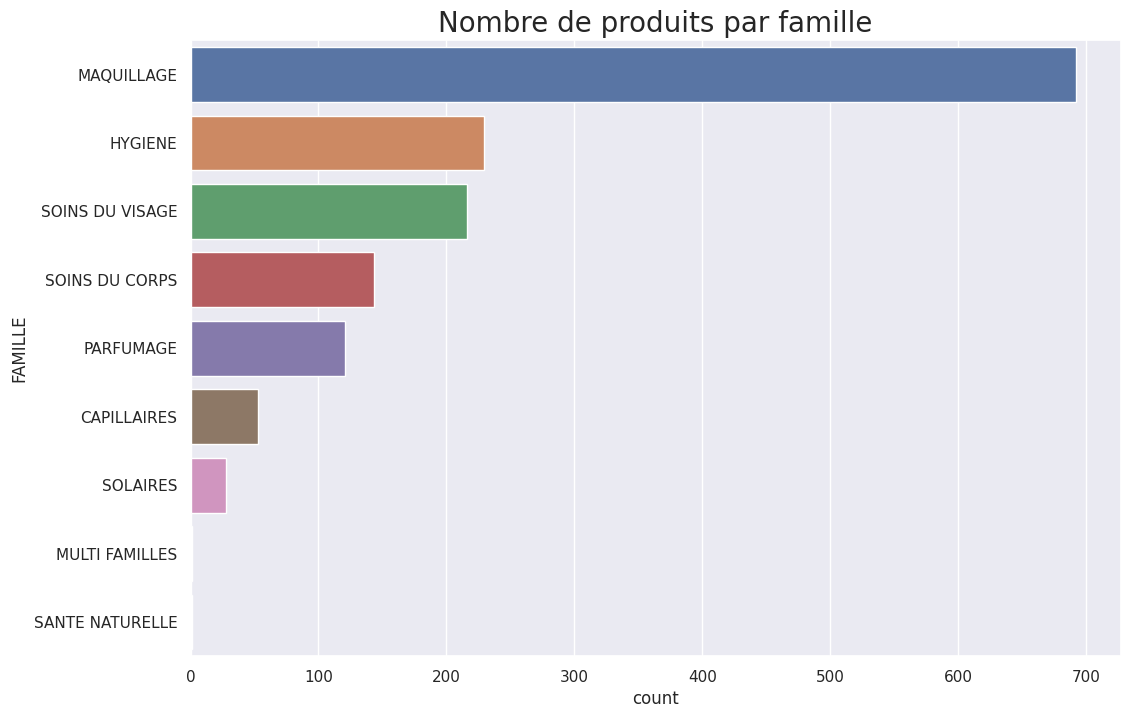

In [207]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data=unique_items_df,
              y='FAMILLE',
              ax=ax,
              order=unique_items_df['FAMILLE'].value_counts().index)
ax.set_title('Nombre de produits par famille', fontsize=20)
fig.savefig('graphs/familles.png', bbox_inches='tight')

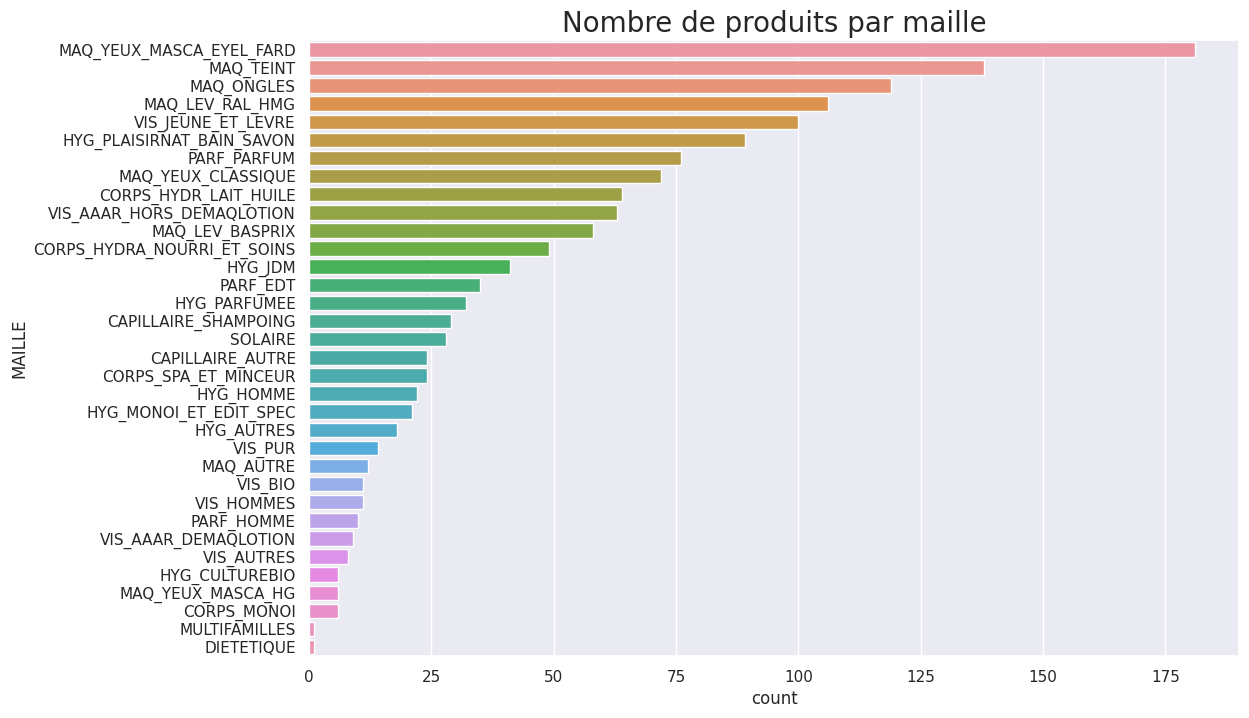

In [208]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data=unique_items_df,
              y='MAILLE',
              ax=ax,
              order=unique_items_df['MAILLE'].value_counts().index)
ax.set_title('Nombre de produits par maille', fontsize=20)
fig.savefig('graphs/mailles.png', bbox_inches='tight')

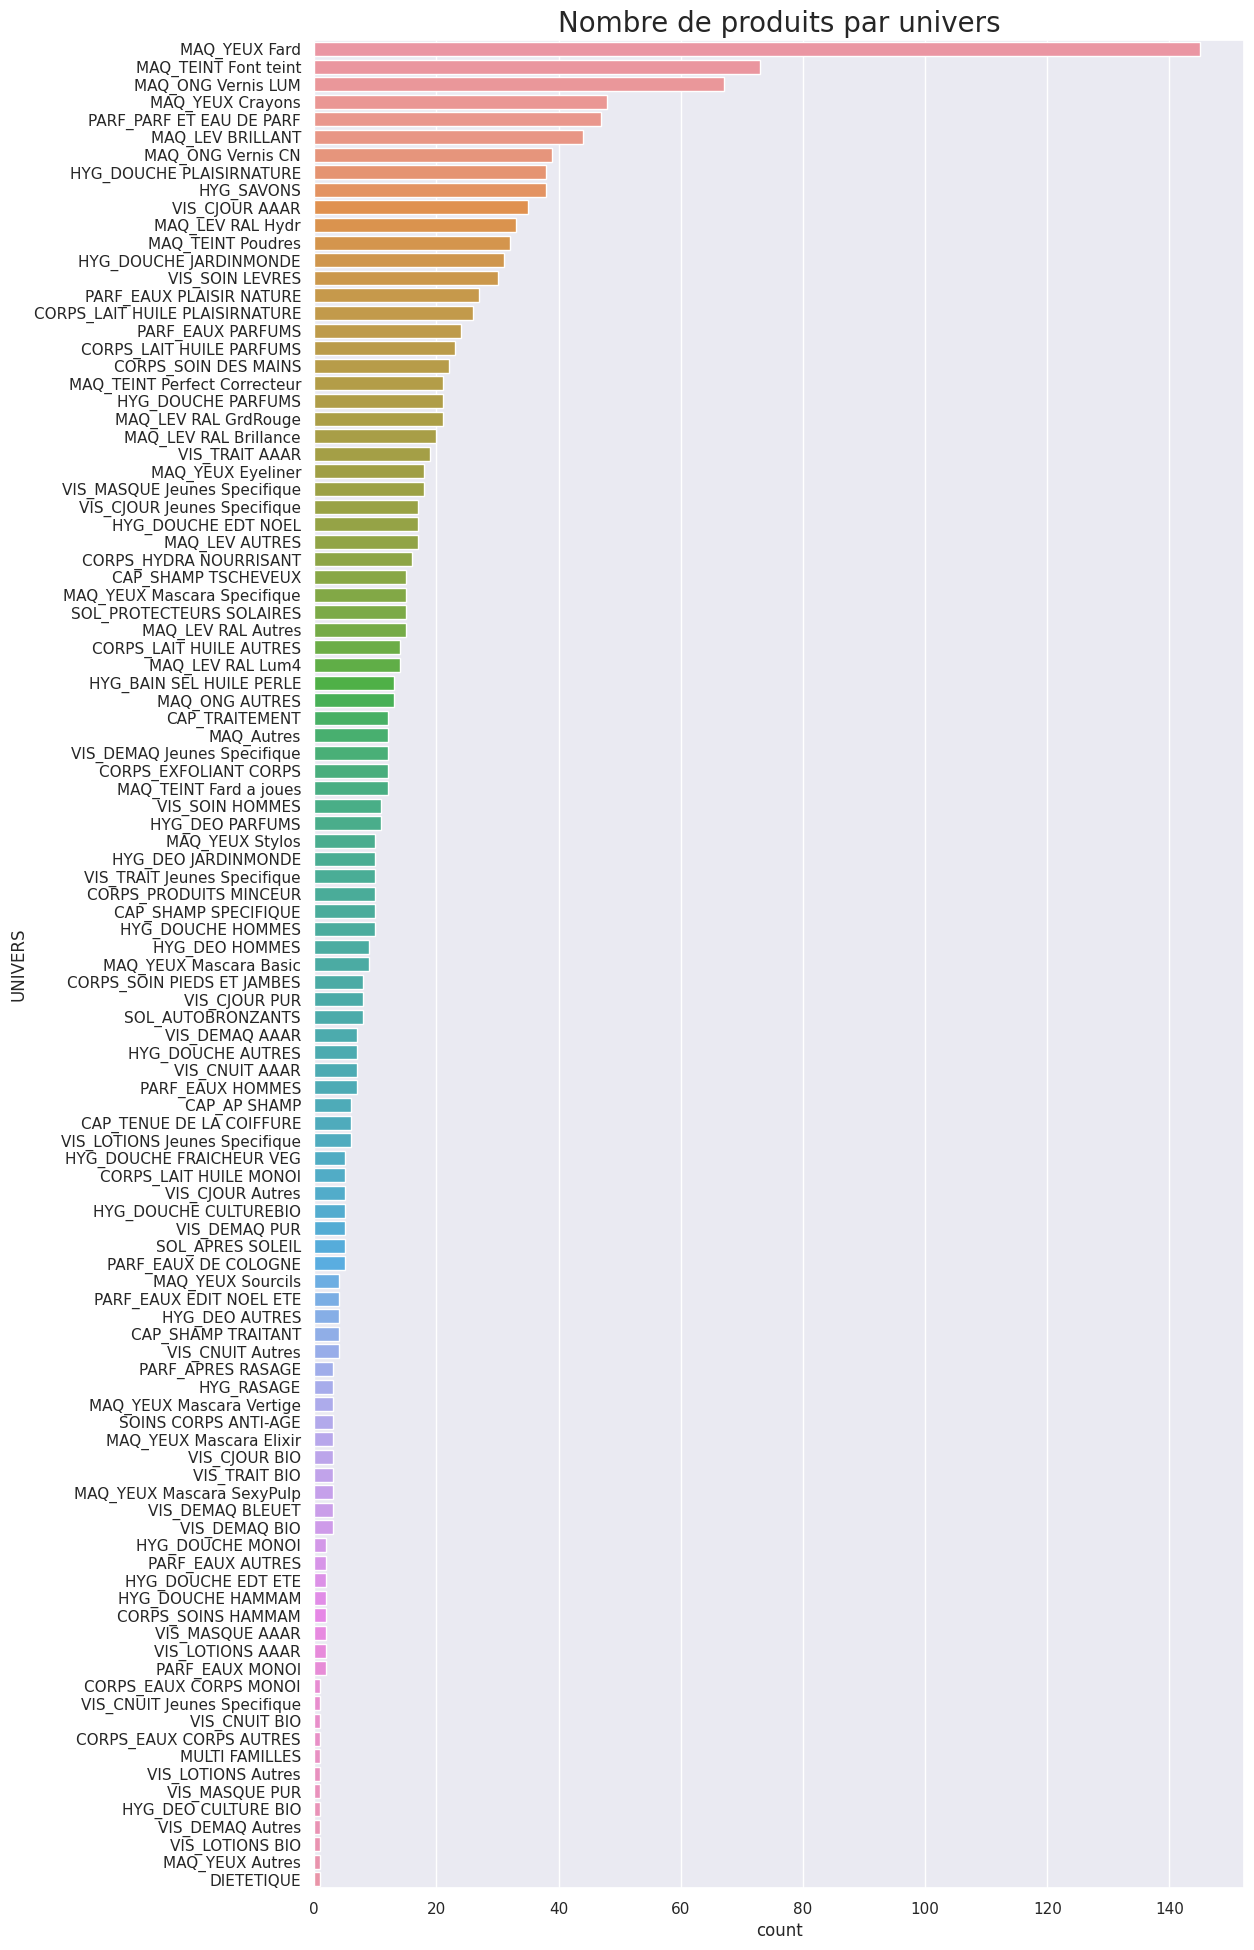

In [209]:
fig, ax = plt.subplots(figsize=(12, 24))
sns.countplot(data=unique_items_df,
              y='UNIVERS',
              ax=ax,
              order=unique_items_df['UNIVERS'].value_counts().index)
ax.set_title('Nombre de produits par univers', fontsize=20)
fig.savefig('graphs/univers.png', bbox_inches='tight')

## Most popular item in each category

In [211]:
popular_items_label = []
popular_items_count = []
for f in families:
    products = data[data['FAMILLE'] == f]['LIBELLE'].value_counts()
    popular_items_label.append(f'{f} - {products.index[0]}')
    popular_items_count.append(products[0])

popular_items_df = pd.DataFrame(data={
    'label': popular_items_label,
    'count': popular_items_count
})


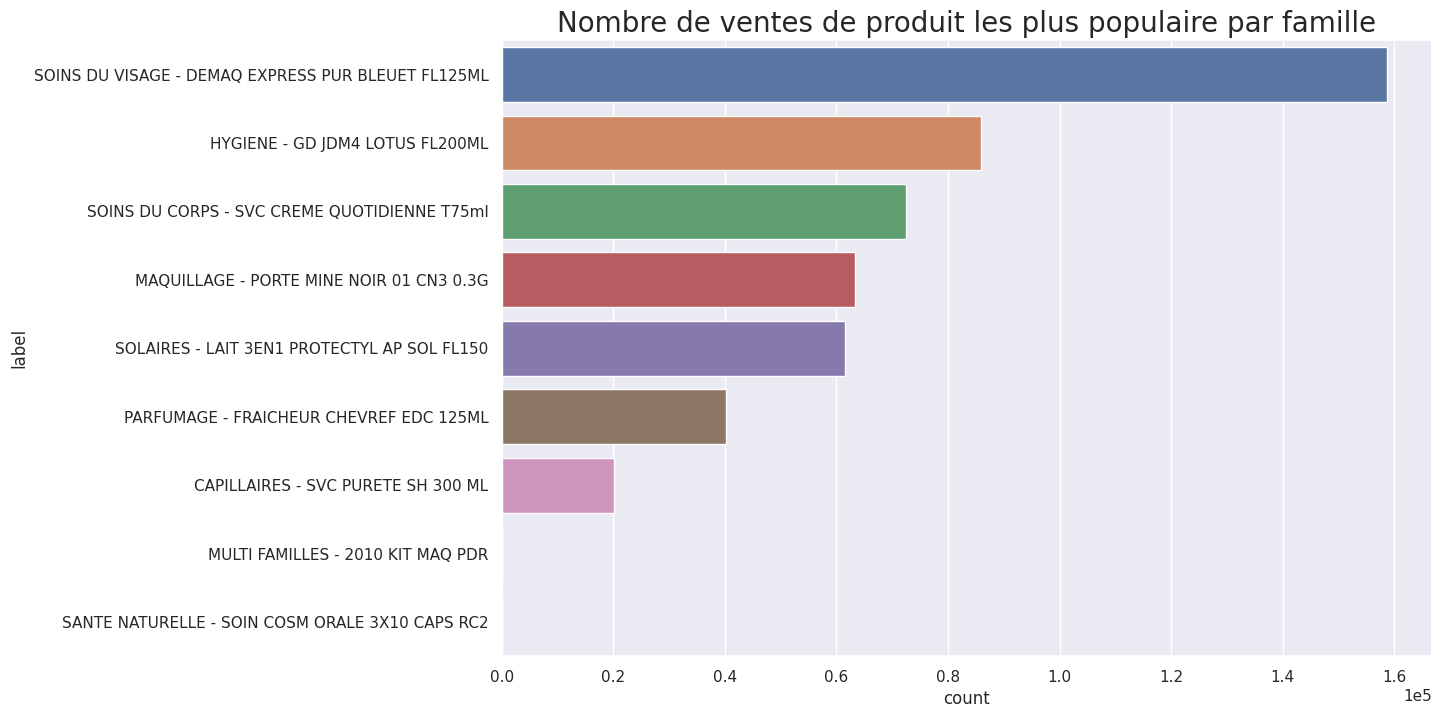

In [212]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=popular_items_df,
            y='label',
            x='count',
            ax=ax,
            order=popular_items_df.sort_values('count',
                                               ascending=False)['label'])
ax.set_title('Nombre de ventes de produit les plus populaire par famille',
             fontsize=20)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
fig.savefig('graphs/popular_items_families.png', bbox_inches='tight')

In [213]:
popular_items_label = []
popular_items_count = []
for m in meshes:
    products = data[data['MAILLE'] == m]['LIBELLE'].value_counts()
    popular_items_label.append(f'{m} - {products.index[0]}')
    popular_items_count.append(products[0])

popular_items_df = pd.DataFrame(data={
    'label': popular_items_label,
    'count': popular_items_count
})


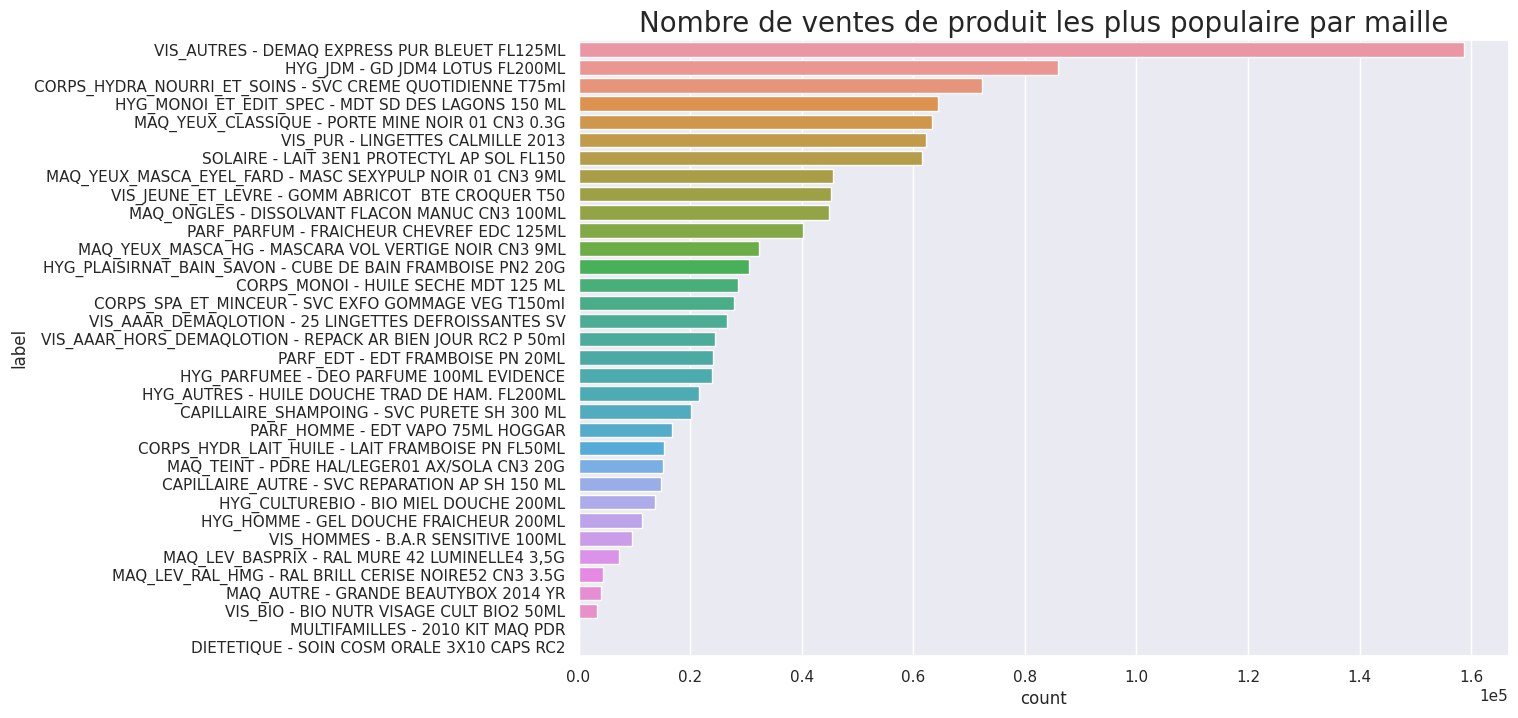

In [214]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=popular_items_df,
            y='label',
            x='count',
            ax=ax,
            order=popular_items_df.sort_values('count',
                                               ascending=False)['label'])
ax.set_title('Nombre de ventes de produit les plus populaire par maille',
             fontsize=20)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
fig.savefig('graphs/popular_items_meshes.png', bbox_inches='tight')

## Mean price for items in the categories

In [215]:
mean_prices = [data[data['FAMILLE'] == f]['PRIX_NET'].mean() for f in families]
mean_prices_df = pd.DataFrame(data={
    'label': families,
    'mean_price': mean_prices
})

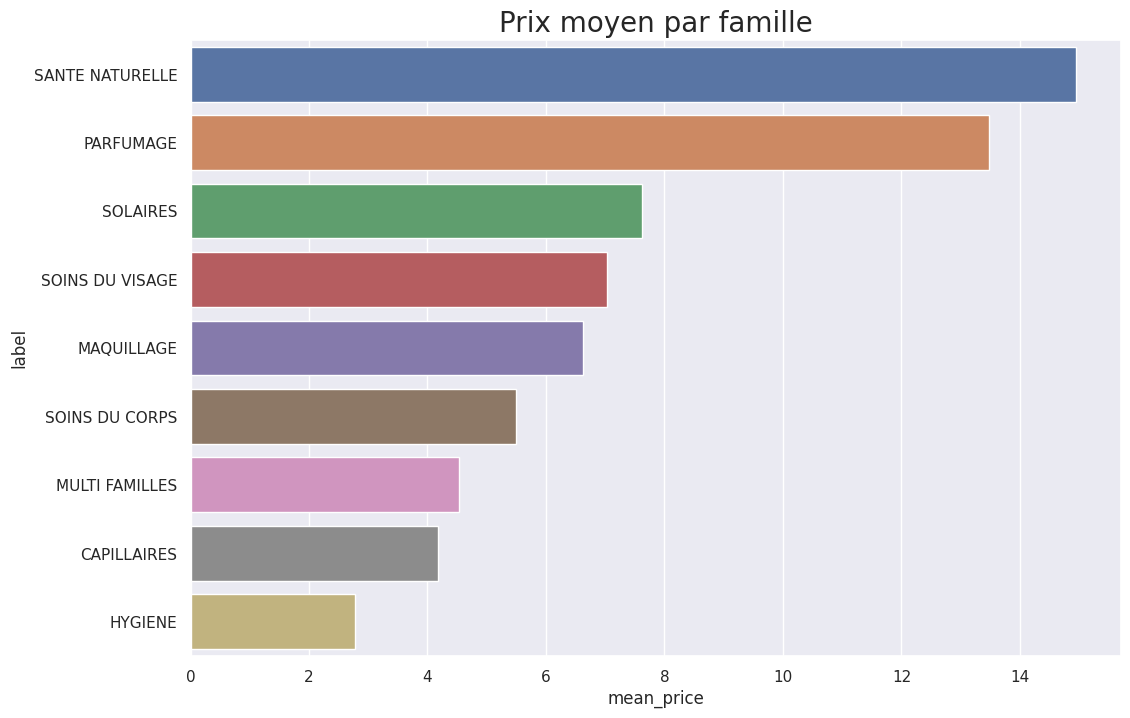

In [216]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=mean_prices_df,
            y='label',
            x='mean_price',
            ax=ax,
            order=mean_prices_df.sort_values('mean_price',
                                             ascending=False)['label'])
ax.set_title('Prix moyen par famille', fontsize=20)
fig.savefig('graphs/mean_prices_families.png', bbox_inches='tight')

In [217]:
mean_prices = [data[data['MAILLE'] == m]['PRIX_NET'].mean() for m in meshes]
mean_prices_df = pd.DataFrame(data={
    'label': meshes,
    'mean_price': mean_prices
})

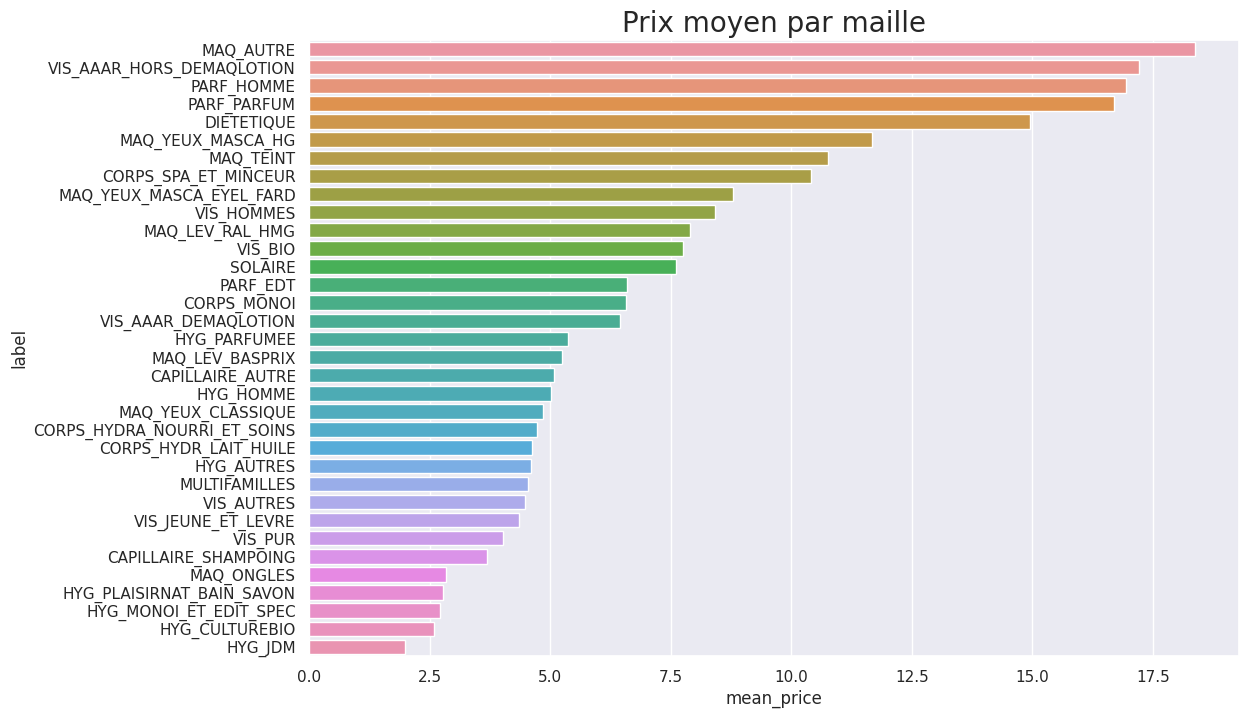

In [218]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=mean_prices_df,
            y='label',
            x='mean_price',
            ax=ax,
            order=mean_prices_df.sort_values('mean_price',
                                             ascending=False)['label'])
ax.set_title('Prix moyen par maille', fontsize=20)
fig.savefig('graphs/mean_prices_meshes.png', bbox_inches='tight')

## Mean and std numbers of items per clients

In [219]:
items_per_client = data['CLI_ID'].value_counts()
print(f'Mean number of products per client: {items_per_client.mean():.1f}')
print(f'STD of products per client: {items_per_client.std():.1f}')

Mean number of products per client: 8.5
STD of products per client: 10.2


## Means price spend

In [220]:
print(f"Mean price spend: {data['PRIX_NET'].mean():.2f}")

Mean price spend: 5.97


## Mean number of items per tickets

In [221]:
items_per_ticket = data['TICKET_ID'].value_counts()
print(f"Mean number of items per tickets: {items_per_ticket.mean():.1f}")


Mean number of items per tickets: 2.6


# PRE-PROCESSING

## Outlier detection

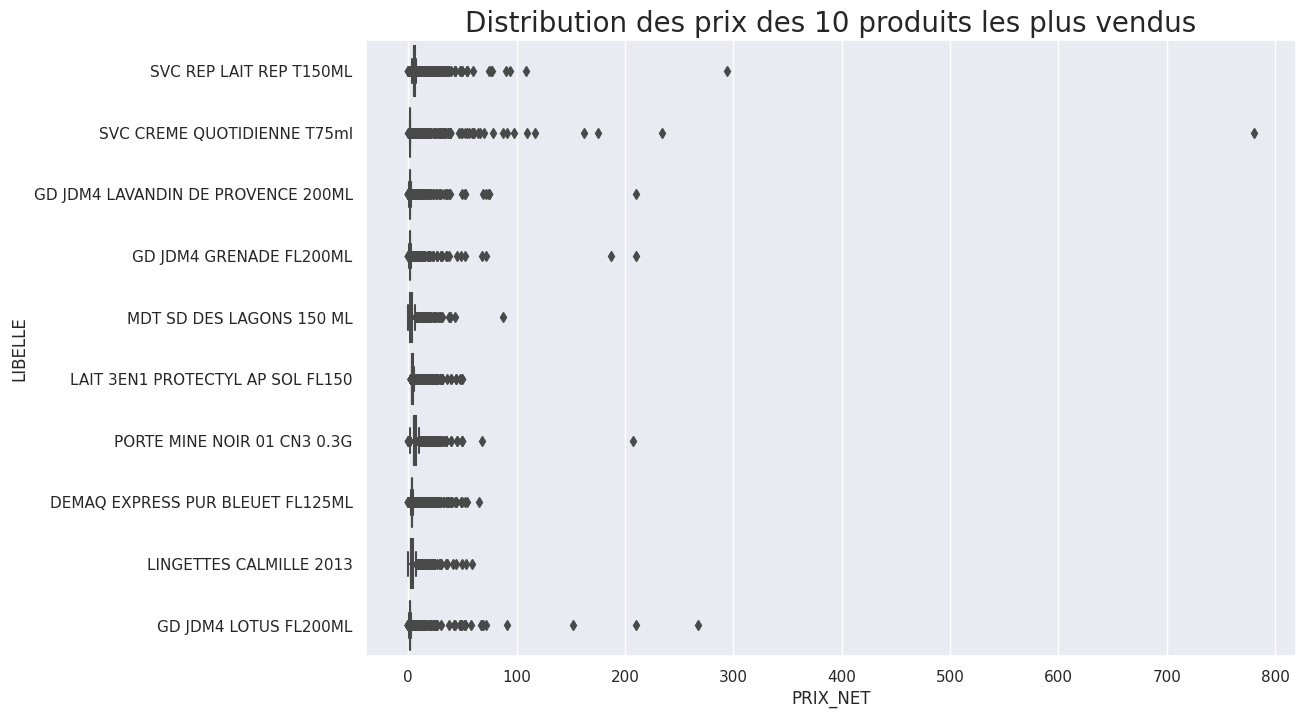

In [281]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=data[data['LIBELLE'].isin(
    data['LIBELLE'].value_counts().index[:10])],
            x="PRIX_NET",
            y="LIBELLE",
            ax=ax,
            orient="h")
ax.set_title('Distribution des prix des 10 produits les plus vendus',
             fontsize=20)
fig.savefig('graphs/price_distribution.png', bbox_inches='tight')

In [276]:
def replace_outliers(df, col, scale=1.5):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - scale * iqr
    upper_bound = q3 + scale * iqr

    df.loc[df[col] < lower_bound, col] = df[col].median()
    df.loc[df[col] > upper_bound, col] = df[col].median()

    return df

In [277]:
def replace_outliers_by_libelle(df, col, scale=1.5):
    df = df.copy()
    for l in df['LIBELLE'].unique():
        df.loc[df['LIBELLE'] == l,
               col] = replace_outliers(df[df['LIBELLE'] == l], col, scale)[col]

    return df

In [278]:
filtered_data = replace_outliers_by_libelle(data, 'PRIX_NET', 1.5)

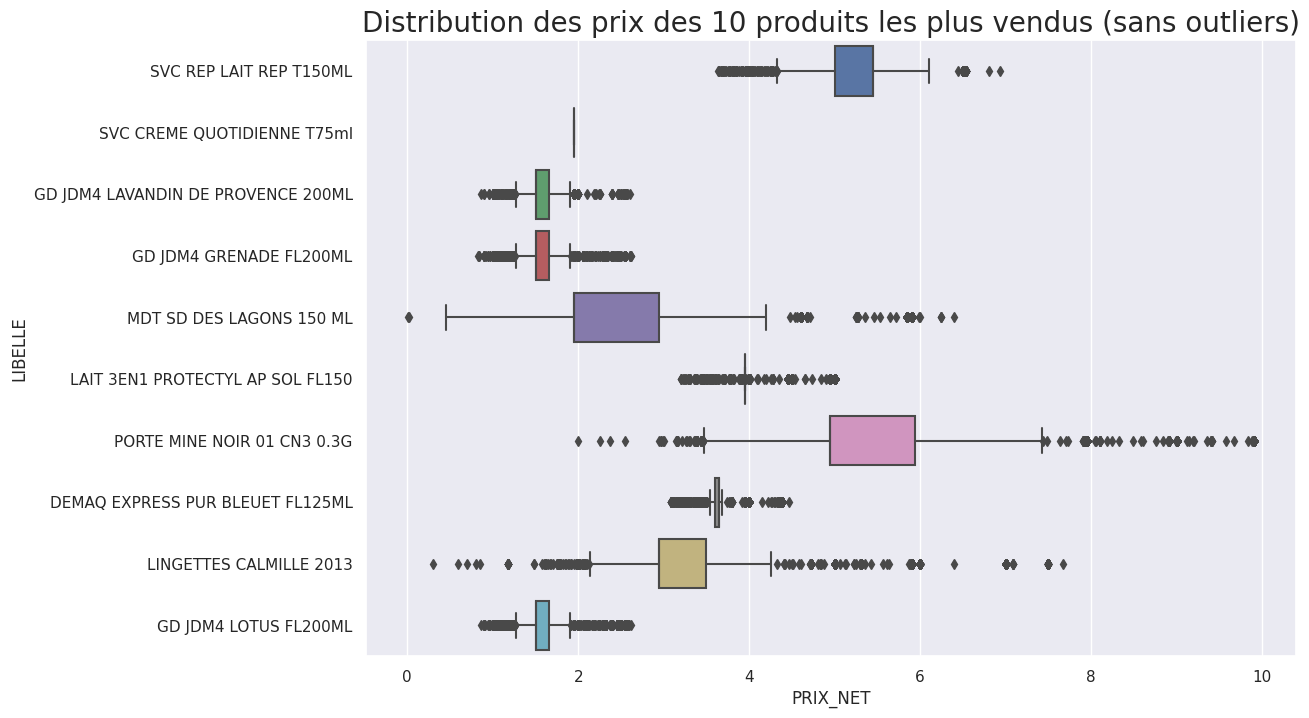

In [280]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=filtered_data[filtered_data['LIBELLE'].isin(
    filtered_data['LIBELLE'].value_counts().index[:10])],
            x="PRIX_NET",
            y="LIBELLE",
            ax=ax,
            orient="h")
ax.set_title(
    'Distribution des prix des 10 produits les plus vendus (sans outliers)',
    fontsize=20)
fig.savefig('graphs/price_distribution_filtered.png', bbox_inches='tight')